# TP Graphe et Optimisation
## FISA 4 Informatique 
### Alaaeddin ALMAJJO | Ayman DOULKOM | Pape THIAM

## 1. Plus court chemin

### 1.1. Construction du graphe 

La structure de données que nous avons choisie ici est une liste d'adjacence pour représenter le graphe non orienté. Dans cette structure, chaque sommet du graphe est représenté par une clé dans un dictionnaire, et la valeur associée à chaque clé est une liste des sommets adjacents à ce sommet.

Nous avons choisi cette structure de données car elle est efficace pour représenter les graphes non orientés, surtout lorsque le graphe est clairsemé (c'est-à-dire qu'il y a relativement peu d'arêtes par rapport au nombre de sommets). Elle permet un accès rapide aux voisins d'un sommet et facilite l'ajout et la suppression d'arêtes.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Ajoute un sommet au graphe s'il n'existe pas déjà.
#Args: sommet : tuple représentant les coordonnées du sommet dans le réseau
def add_sommet(adjacency_list, sommet):
    if sommet not in adjacency_list:
        adjacency_list[sommet] = []

#Supprime un sommet et toutes les arêtes adjacentes du graphe représenté par la liste d'adjacence.
#Args:- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
#     - sommet : tuple représentant les coordonnées du sommet à supprimer
#Cette fonction supprime le sommet de la liste d'adjacence et supprime toutes les arêtes adjacentes.
def remove_sommet(adjacency_list, sommet):
    if sommet in adjacency_list:
        del adjacency_list[sommet]
        for s, voisins in adjacency_list.items():
            if sommet in voisins:
                voisins.remove(sommet)

In [3]:

#Ajoute une arête entre deux sommets du graphe.
#Args:  - sommet1 : tuple représentant les coordonnées du premier sommet
#        - sommet2 : tuple représentant les coordonnées du deuxième sommet
#Cette fonction ajoute une arête entre sommet1 et sommet2 en ajoutant sommet2 à la liste d'adjacence
#de sommet1, et vice versa, s'ils ne sont pas déjà connectés.
def add_edge(adjacency_list, sommet1, sommet2):
    if sommet1 in adjacency_list and sommet2 in adjacency_list:
        if sommet2 not in adjacency_list[sommet1]:
            adjacency_list[sommet1].append(sommet2)
        if sommet1 not in adjacency_list[sommet2]:
            adjacency_list[sommet2].append(sommet1)


#Supprime une arête entre deux sommets du graphe représenté par la liste d'adjacence.
#Args:
#    - adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
#    - sommet1 : tuple représentant les coordonnées du premier sommet
#    - sommet2 : tuple représentant les coordonnées du deuxième sommet   
#Cette fonction supprime l'arête entre sommet1 et sommet2 en retirant sommet2 de la liste d'adjacence
#de sommet1, et vice versa, s'ils sont connectés.
def remove_edge(adjacency_list, sommet1, sommet2):
    if sommet1 in adjacency_list and sommet2 in adjacency_list:
        if sommet2 in adjacency_list[sommet1]:
            adjacency_list[sommet1].remove(sommet2)
        if sommet1 in adjacency_list[sommet2]:
            adjacency_list[sommet2].remove(sommet1)



In [4]:
"""
Renvoie la liste des sommets voisins d'un sommet donné dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet : tuple représentant les coordonnées du sommet
Returns:
- list : liste des sommets voisins du sommet donné
Cette fonction renvoie la liste des sommets voisins du sommet donné dans le graphe.
"""
def get_neighbors(adjacency_list, sommet):

    if sommet in adjacency_list:
        return adjacency_list[sommet]
    else:
        return []



"""
Renvoie le degré d'un sommet donné dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet : tuple représentant les coordonnées du sommet
Returns:
- int : degré du sommet
Cette fonction renvoie le nombre d'arêtes incidentes au sommet donné, c'est-à-dire le nombre de voisins du sommet.
"""
def get_degree(adjacency_list, sommet):
    if sommet in adjacency_list:
        return len(adjacency_list[sommet])
    else:
        return 0
    
"""
Vérifie si deux sommets sont adjacents dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- bool : True si les sommets sont adjacents, False sinon
Cette fonction vérifie si sommet2 est présent dans la liste d'adjacence de sommet1, et vice versa.
"""
def are_adjacent(adjacency_list, sommet1, sommet2):
    return sommet2 in adjacency_list.get(sommet1, []) and sommet1 in adjacency_list.get(sommet2, [])


"""
Vérifie si une arête existe entre deux sommets donnés dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- bool : True si une arête existe entre les sommets, False sinon
Cette fonction vérifie si sommet2 est présent dans la liste d'adjacence de sommet1, ou vice versa.
"""
def edge_exists(adjacency_list, sommet1, sommet2):
    return sommet2 in adjacency_list.get(sommet1, []) or sommet1 in adjacency_list.get(sommet2, [])

In [21]:
"""
Calucule la distance euclidienne entre deux sommets
Args:
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- int : la distance calculée
"""
def calculate_distance(sommet1, sommet2):
    x1, y1 = sommet1
    x2, y2 = sommet2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

s1 = (0, 0) 
s2 = (5, 2)
d = calculate_distance(s1, s2)
print(f"la distance entre s1:{s1} et s2:{s2} est {d}")

la distance entre s1:(0, 0) et s2:(5, 2) est 5.385164807134504


In [5]:
"""
Calucule la distance de manhattan entre deux sommets
Args:
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- int : la distance de manhatttan calculée
"""
def calculate_manhattan_distance(sommet1, sommet2):
    x1, y1 = sommet1
    x2, y2 = sommet2
    distance = abs(x2 - x1) + abs(y2 - y1)
    return distance

#sommet1 = (0, 0)
#sommet2 = (3, 4)
#distance_manhattan = calculate_manhattan_distance(sommet1, sommet2)
#print("La distance de Manhattan entre sommet1 et sommet2 est:", distance_manhattan)


In [15]:
#Crée le graphe à partir d'un fichier texte représentant le réseau.
#Args: - filename : nom du fichier texte contenant les informations sur le réseau
#Cette fonction lit les dimensions du réseau et les valeurs de chaque case à partir du fichier,
#puis ajoute les sommets et les arêtes correspondants au graphe en fonction des valeurs lues.
def create_graph_from_file(filename):
    adjacency_list = {}
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    print(grid)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 1 or grid[i][j] == 2 or grid[i][j] == 3:
                # Ajoute le sommet si la case est accessible (1, 2 ou 3)
                add_sommet(adjacency_list, (i, j))
                # Connecte le sommet aux sommets voisins s'ils sont également accessibles
                if i > 0 and (grid[i-1][j] == 1 or grid[i-1][j] == 2 or grid[i-1][j] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j))  # Connect to the above sommet
                if j > 0 and (grid[i][j-1] == 1 or grid[i][j-1] == 2 or grid[i][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i, j-1))  # Connect to the left sommet
                if i < n - 1 and (grid[i+1][j] == 1 or grid[i+1][j] == 2 or grid[i+1][j] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j))  # Connect to the below sommet
                if j < m - 1 and (grid[i][j+1] == 1 or grid[i][j+1] == 2 or grid[i][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i, j+1))  # Connect to the right sommet
                if i < n-1 and j < m-1 and (grid[i+1][j+1] == 1 or grid[i+1][j+1] == 2 or grid[i+1][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j+1))  # Connect to the above sommet
                if i > 0 and j > 0 and (grid[i-1][j-1] == 1 or grid[i-1][j-1] == 2 or grid[i-1][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j-1))  # Connect to the above sommet
                if i > 0 and j < m-1 and (grid[i-1][j+1] == 1 or grid[i-1][j+1] == 2 or grid[i-1][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j+1))  # Connect to the above sommet
                if i < n-1 and j > 0 and (grid[i+1][j-1] == 1 or grid[i+1][j-1] == 2 or grid[i+1][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j-1))  # Connect to the above sommet
                
    
    print("Le graphe a été créé avec succès à partir du fichier:", filename)
    print(adjacency_list)
    return adjacency_list



In [14]:
#Dessine le graphe en utilisant matplotlib.
#Args:- graph : objet Graph contenant les informations sur le graphe
#Cette fonction dessine les sommets et les arêtes du graphe en utilisant matplotlib.
def plot_graph(graph):
    # Crée une nouvelle figure
    plt.figure(figsize=(8, 8))

    # Dessine les sommets
    for sommet in adjacency_list.keys():
        plt.plot(sommet[1], sommet[0], 'o', markersize=10, color='blue')  # Inverser les coordonnées x et y
    
    # Dessine les arêtes
    for sommet, voisins in adjacency_list.items():
        for voisin in voisins:
            plt.plot([sommet[1], voisin[1]], [sommet[0], voisin[0]], 'k-', linewidth=2)  # Inverser les coordonnées x et y
    
    # Définit les limites des axes
    plt.xlim(-1, max(max(coord[1] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge à droite
    plt.ylim(-1, max(max(coord[0] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge en bas
    
    # Ajoute des titres et étiquettes
    plt.title('Représentation du graphe')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    
    # Affiche le graphe
    plt.grid(True)
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    plt.show()

    #plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    #plt.show()


[[1, 2, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 3, 1, 1]]
Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt
{(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3,

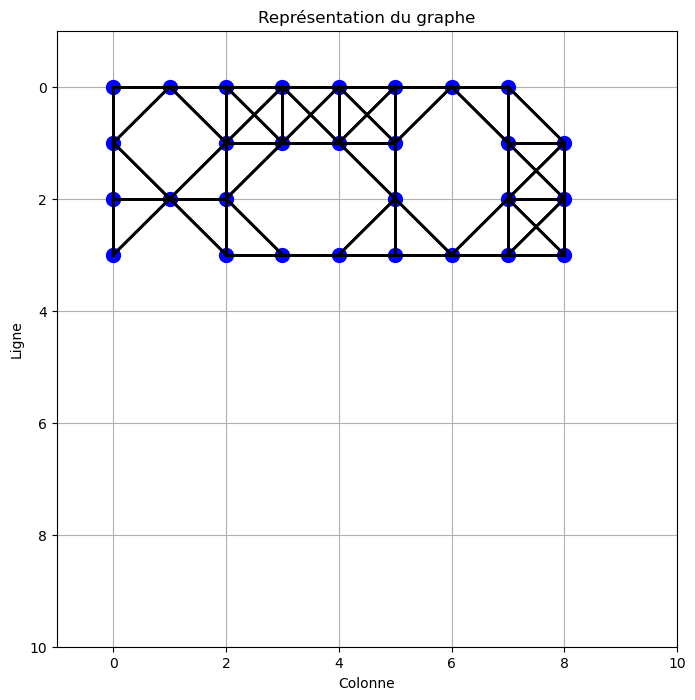

In [16]:
# Cellule 2 : Création du graphe à partir du fichier texte
adjacency_list = create_graph_from_file("exos/exo1.txt")
plot_graph(adjacency_list)

### 1.2 Modélisation  mathématique

### Modélisation du Problème Sous Forme de Programme Linéaire

#### Variables de Décision :
- $x_{ij}$ : Variable binaire indiquant si l'arête reliant le sommet i au sommet j est incluse dans le chemin (1 si inclus, 0 sinon).

#### Fonction Objective :
Minimiser la somme des coûts des arêtes incluses dans le chemin :
$ \text{Min} \sum_{(i,j) \in E} c_{ij} \cdot x_{ij} $

#### Contraintes :
1. Contraintes de Flux :
   - Pour chaque sommet (sauf la source et la destination), le nombre d'arêtes entrantes est égal au nombre d'arêtes sortantes :
     $ \sum_{i} x_{ij} = \sum_{j} x_{ji} \quad \text{pour tout } j \neq s,t $
   - Pour la source, le nombre d'arêtes sortantes est égal à 1 :
     $ \sum_{j} x_{sj} = 1 $
   - Pour la destination, le nombre d'arêtes entrantes est égal à 1 :
     $ \sum_{i} x_{it} = 1 $

2. Contraintes de Sous-Cycles :
   - Pour éviter les sous-cycles, nous pouvons ajouter des contraintes de type inégalité triangulaire :
     $ d_{ik} \leq d_{ij} + d_{jk} \quad \text{pour tout } i,j,k $

### Implémentation en Utilisant CPLEX

1. Utilisez la bibliothèque CPLEX pour définir et résoudre le modèle mathématique.
2. Récupérez la solution optimale du modèle pour construire le plus court chemin entre les sommets source et destination.

/*********************************************
 * OPL 22.1.1.0 Model
 * Author: papemayeldiagnethiam
 * Creation Date: Apr 16, 2024 at 9:47:28 PM
 *********************************************/
<br>tuple edge
{
   key int o;
   key int d;
   float weight;
}

{edge} edges=...;

{int} nodes={i.o | i in edges} union {i.d | i in edges};
int st=...; // start (source)
int en=...; // end (destination)

dvar int obj; // distance
dvar boolean x[edges]; // do we use that edge ?

minimize obj;

subject to
{
obj==sum(e in edges) x[e]*e.weight;

forall(i in nodes)
    sum(e in edges:e.o==i) x[e]
    -sum(e in edges:e.d==i) x[e]    
    ==
    ((i==st)?1:((i==en)?(-1):0));
}

{edge} shortestPath={e | e in edges : x[e]==1};

execute
{
writeln(shortestPath);

}



### Fonction de Sauvegarde de la Solution

Implémentez une fonction qui prend en entrée la solution du problème (les arêtes incluses dans le chemin) et sauvegarde cette solution dans un fichier texte. Le nom du fichier de solution doit suivre le format spécifié (sol_fichier.txt).

En suivant cette approche, vous pourrez modéliser, résoudre et sauvegarder le problème du plus court chemin entre deux sommets distincts d'un réseau à l'aide de CPLEX.

In [17]:

graph = {(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3, 2), (3, 3)], (2, 5): [(1, 5), (1, 4), (3, 4), (3, 5), (3, 6)], (2, 7): [(1, 7), (1, 8), (2, 8), (3, 6), (3, 7), (3, 8)], (2, 8): [(1, 8), (2, 7), (1, 7), (3, 7), (3, 8)], (3, 0): [(2, 0), (2, 1)], (3, 2): [(2, 2), (2, 1), (3, 3)], (3, 3): [(3, 2), (2, 2), (3, 4)], (3, 4): [(3, 3), (2, 5), (3, 5)], (3, 5): [(2, 5), (3, 4), (3, 6)], (3, 6): [(3, 5), (2, 5), (2, 7), (3, 7)], (3, 7): [(2, 7), (3, 6), (2, 8), (3, 8)], (3, 8): [(2, 8), (3, 7), (2, 7)]}

correspondence = {}  # Dictionnaire pour la correspondance

# Numérotation des sommets et création de la correspondance
for i, sommet in enumerate(graph.keys(), start=1):
    correspondence[i] = sommet

print(correspondence)


{1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4), 6: (0, 5), 7: (0, 6), 8: (0, 7), 9: (1, 0), 10: (1, 2), 11: (1, 3), 12: (1, 4), 13: (1, 5), 14: (1, 7), 15: (1, 8), 16: (2, 0), 17: (2, 1), 18: (2, 2), 19: (2, 5), 20: (2, 7), 21: (2, 8), 22: (3, 0), 23: (3, 2), 24: (3, 3), 25: (3, 4), 26: (3, 5), 27: (3, 6), 28: (3, 7), 29: (3, 8)}


In [30]:
def correspondence(graph):
    correspondence = {}  # Nouveau graphe avec les bonnes correspondances

    # Numérotation des sommets et création de la correspondance
    for i, sommet in enumerate(graph.keys(), start=1):
        correspondence[i] = sommet
    #print(correspondence)
    return correspondence

def reorganize_graph(graph):
    correspondence_value = correspondence(graph)  # Dictionnaire pour la correspondance
    new_graph = {}  # Nouveau graphe avec les bonnes correspondances

    # Numérotation des sommets et création de la correspondance
    """for i, sommet in enumerate(graph.keys(), start=1):
        correspondence[i] = sommet
    print('§§§§')
    print(correspondence)
    print('§§§§')"""
    
    # Création du nouveau graphe avec les bonnes correspondances
    for sommet, voisins in graph.items():
        new_sommet = correspondence_inv(sommet, correspondence_value)
        new_voisins = [correspondence_inv(voisin, correspondence_value) for voisin in voisins]
        new_graph[new_sommet] = new_voisins

    return new_graph


def correspondence_inv(sommet, correspondence):
    for key, value in correspondence.items():
        if value == sommet:
            return key


# Exemple d'utilisation
graph = {(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3, 2), (3, 3)], (2, 5): [(1, 5), (1, 4), (3, 4), (3, 5), (3, 6)], (2, 7): [(1, 7), (1, 8), (2, 8), (3, 6), (3, 7), (3, 8)], (2, 8): [(1, 8), (2, 7), (1, 7), (3, 7), (3, 8)], (3, 0): [(2, 0), (2, 1)], (3, 2): [(2, 2), (2, 1), (3, 3)], (3, 3): [(3, 2), (2, 2), (3, 4)], (3, 4): [(3, 3), (2, 5), (3, 5)], (3, 5): [(2, 5), (3, 4), (3, 6)], (3, 6): [(3, 5), (2, 5), (2, 7), (3, 7)], (3, 7): [(2, 7), (3, 6), (2, 8), (3, 8)], (3, 8): [(2, 8), (3, 7), (2, 7)]}
new_graph = reorganize_graph(graph)
print(new_graph)


§§§§
{1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4), 6: (0, 5), 7: (0, 6), 8: (0, 7), 9: (1, 0), 10: (1, 2), 11: (1, 3), 12: (1, 4), 13: (1, 5), 14: (1, 7), 15: (1, 8), 16: (2, 0), 17: (2, 1), 18: (2, 2), 19: (2, 5), 20: (2, 7), 21: (2, 8), 22: (3, 0), 23: (3, 2), 24: (3, 3), 25: (3, 4), 26: (3, 5), 27: (3, 6), 28: (3, 7), 29: (3, 8)}
§§§§
{1: [2, 9], 2: [1, 3, 9, 10], 3: [2, 4, 10, 11], 4: [3, 5, 10, 11, 12], 5: [4, 6, 11, 12, 13], 6: [5, 7, 12, 13], 7: [6, 8, 13, 14], 8: [7, 14, 15], 9: [1, 2, 16, 17], 10: [3, 2, 4, 11, 17, 18], 11: [4, 10, 3, 5, 12, 18], 12: [5, 11, 4, 6, 13, 19], 13: [6, 12, 5, 7, 19], 14: [8, 7, 15, 20, 21], 15: [14, 8, 20, 21], 16: [9, 17, 22], 17: [16, 9, 10, 18, 22, 23], 18: [10, 17, 11, 23, 24], 19: [13, 12, 25, 26, 27], 20: [14, 15, 21, 27, 28, 29], 21: [15, 20, 14, 28, 29], 22: [16, 17], 23: [18, 17, 24], 24: [23, 18, 25], 25: [24, 19, 26], 26: [19, 25, 27], 27: [26, 19, 20, 28], 28: [20, 27, 21, 29], 29: [21, 28, 20]}


In [43]:
import math

def calculate_distances(graph):
    distances = []
    
    for sommet, voisins in graph.items():
        for voisin in voisins:
            distance = math.sqrt((voisin[0] - sommet[0])**2 + (voisin[1] - sommet[1])**2)
            distances.append([sommet, voisin, distance])

    
    
    return distances

# Exemple d'utilisation
graph = {(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3, 2), (3, 3)], (2, 5): [(1, 5), (1, 4), (3, 4), (3, 5), (3, 6)], (2, 7): [(1, 7), (1, 8), (2, 8), (3, 6), (3, 7), (3, 8)], (2, 8): [(1, 8), (2, 7), (1, 7), (3, 7), (3, 8)], (3, 0): [(2, 0), (2, 1)], (3, 2): [(2, 2), (2, 1), (3, 3)], (3, 3): [(3, 2), (2, 2), (3, 4)], (3, 4): [(3, 3), (2, 5), (3, 5)], (3, 5): [(2, 5), (3, 4), (3, 6)], (3, 6): [(3, 5), (2, 5), (2, 7), (3, 7)], (3, 7): [(2, 7), (3, 6), (2, 8), (3, 8)], (3, 8): [(2, 8), (3, 7), (2, 7)]}
distances = calculate_distances(graph)
correspondence_value = correspondence(graph)
print(distances)
def test(distances):
    new_d = distances
    for arete in new_d:
        for i in range(0, 2):
            print(arete[i])
            arete[i] = correspondence_inv(arete[i], correspondence_value)
            print(arete[i])
    return new_d
print("""""""")
print(test(distances))

§§§§
{1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4), 6: (0, 5), 7: (0, 6), 8: (0, 7), 9: (1, 0), 10: (1, 2), 11: (1, 3), 12: (1, 4), 13: (1, 5), 14: (1, 7), 15: (1, 8), 16: (2, 0), 17: (2, 1), 18: (2, 2), 19: (2, 5), 20: (2, 7), 21: (2, 8), 22: (3, 0), 23: (3, 2), 24: (3, 3), 25: (3, 4), 26: (3, 5), 27: (3, 6), 28: (3, 7), 29: (3, 8)}
§§§§
[[(0, 0), (0, 1), 1.0], [(0, 0), (1, 0), 1.0], [(0, 1), (0, 0), 1.0], [(0, 1), (0, 2), 1.0], [(0, 1), (1, 0), 1.4142135623730951], [(0, 1), (1, 2), 1.4142135623730951], [(0, 2), (0, 1), 1.0], [(0, 2), (0, 3), 1.0], [(0, 2), (1, 2), 1.0], [(0, 2), (1, 3), 1.4142135623730951], [(0, 3), (0, 2), 1.0], [(0, 3), (0, 4), 1.0], [(0, 3), (1, 2), 1.4142135623730951], [(0, 3), (1, 3), 1.0], [(0, 3), (1, 4), 1.4142135623730951], [(0, 4), (0, 3), 1.0], [(0, 4), (0, 5), 1.0], [(0, 4), (1, 3), 1.4142135623730951], [(0, 4), (1, 4), 1.0], [(0, 4), (1, 5), 1.4142135623730951], [(0, 5), (0, 4), 1.0], [(0, 5), (0, 6), 1.0], [(0, 5), (1, 4), 1.4142135623730951], 

In [61]:
#Récupère la source du graphe depuis le fichier
def get_source_graph_from_file(filename):
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 2:
                return (i, j)


#Récupére la destination du graphe depuis le fichier
def get_destination_graph_from_file(filename):
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 3:
                return (i, j)
                

# test des fonctions
filename = './exos/exo1.txt'
source = get_source_graph_from_file(filename)
destination = get_destination_graph_from_file(filename)
print(f"source: {source}")
print(f"destination: {destination}")

source: (0, 1)
destination: (3, 6)


In [62]:
from datetime import datetime

def generate_dat_file(source, destination, distances, filename):
    with open(filename, 'w') as file:
        file.write("/*********************************************\n")
        file.write(" * OPL 22.1.1.0 Data\n")
        file.write(" * Author: papemayeldiagnethiam\n")
        file.write(f" * Creation Date: {datetime.now()}\n")
        file.write(" *********************************************/\n\n")
        file.write(f"st = {source};\n")
        file.write(f"en = {destination};\n\n")
        file.write("edges=\n{\n")
        for edge in distances:
            file.write("<{}, {}, {}>,\n".format(edge[0], edge[1], edge[2]))
        file.write("};\n")

# Exemple d'utilisation
#distances = [[1, 2, 1], [1, 3, "sqrt(2)"]]
filename = "../CPLEX/shortest-path/shortest-path.dat"
adjacency_list = create_graph_from_file("exos/exo1.txt")
correspondence_value = correspondence(adjacency_list) 
filename_graph = './exos/exo1.txt'
source = correspondence_inv(get_source_graph_from_file(filename_graph), correspondence_value)
destination = correspondence_inv(get_destination_graph_from_file(filename_graph), correspondence_value)
generate_dat_file(source, destination, distances, filename)
print("Fichier", filename, "généré avec succès.")



[[1, 2, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 3, 1, 1]]
Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt
{(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3,

In [104]:
import matplotlib.pyplot as plt

def plot_path(path):
    # Crée une nouvelle figure
    plt.figure(figsize=(8, 8))
    
    # Extraire les coordonnées x et y du chemin
    x = [p[0] for p in path]
    y = [p[1] for p in path]

    # Tracer le chemin
    plt.plot(y, x, 'o', markersize=10, color='blue', linestyle="-")

    # Définit les limites des axes
    plt.xlim(-1, max(max(coord[1] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge à droite
    plt.ylim(-1, max(max(coord[0] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge en bas

    # Ajoute des titres et étiquettes
    plt.title('Représentation du plus court chemin')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    
    # Affiche le graphe
    plt.grid(True)
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    plt.show()

# Exemple d'utilisation
#path = [(0, 0), (0, 1), (4, 0)]
#plot_path(path)


In [106]:
def read_edges_solution_from_file(filename):
    edges = []
    with open(filename, 'r') as file:
        content = file.read()
        # Supprimer les caractères spéciaux et les espaces
        content = content.replace('{', '').replace('}', '').replace('<', '').replace('>', '').replace('\n', '')
        # Séparer les entrées par des espaces
        entries = content.split()
        print(entries)
        for i in range (0, len(entries), 3):
            triplet = []
            triplet.append(int(entries[i]))
            triplet.append(int(entries[i+1]))
            triplet.append(int(entries[i+2]))
            edges.append(triplet)    
    return edges


# Exemple d'utilisation
filename = "solution.txt"
edges = read_edges_from_file(filename)
print(edges)


['2', '3', '1', '3', '4', '1', '4', '5', '1', '5', '12', '1', '12', '13', '1', '13', '19', '1', '19', '26', '1', '26', '27', '1']
[[2, 3, 1], [3, 4, 1], [4, 5, 1], [5, 12, 1], [12, 13, 1], [13, 19, 1], [19, 26, 1], [26, 27, 1]]


['2', '3', '1', '3', '4', '1', '4', '5', '1', '5', '12', '1', '12', '13', '1', '13', '19', '1', '19', '26', '1', '26', '27', '1']
8
[(0, 1), (0, 4), (1, 5), (0, 3), (1, 4), (0, 2), (3, 6), (2, 5), (3, 5)]


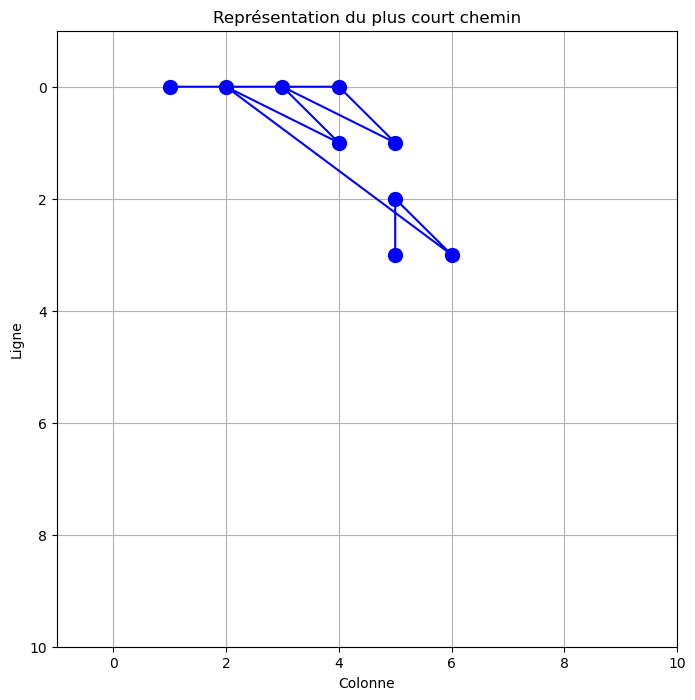

In [107]:
def shortest_path_solved_from_cplex(correspondence_value, filename_sol_cplex, filename_sol_save):
    total_cost = 0
    shortest_path = []
    edges = read_edges_solution_from_file(filename)
    for key, value in correspondence_value.items():
        for edge in edges:
            if key == edge[0]:
                shortest_path.append(value)
            if key == edge[1]:
                shortest_path.append(value)
    for edge in edges:
        total_cost += edge[2]
    path_out = list(set(shortest_path))
    with open(filename_sol_save, 'w') as file:
        file.write(f"{total_cost}\n")
        file.write(f"{path_out}\n")    
    
    print(total_cost)
    print(path_out)

    return path_out

shortest_path = shortest_path_solved_from_cplex(correspondence_value, 'solution.txt', 'sol_exo1.txt')
plot_path(shortest_path)
    

### 1.3  Algorithme de cheminement

In [108]:
import heapq

def calculate_heuristic(sommet, destination):
    # Calcule la distance euclidienne entre le sommet et la destination
    x1, y1 = sommet
    x2, y2 = destination
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def astar(graph, source, destination):
    open_list = [(0, source)]  # (f(x), sommet)
    closed_list = set()
    came_from = {}
    g_score = {sommet: float('inf') for sommet in graph}
    g_score[source] = 0

    while open_list:
        f, current = heapq.heappop(open_list)
        if current == destination:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(source)
            path.reverse()
            return path

        closed_list.add(current)
        for neighbor in graph[current]:
            if neighbor in closed_list:
                continue
            tentative_g_score = g_score[current] + 1  # Coût unitaire entre les sommets
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + calculate_heuristic(neighbor, destination)
                heapq.heappush(open_list, (f_score, neighbor))

    return None  # Aucun chemin trouvé

adjacency_list = create_graph_from_file("exos/exo1.txt")
source = (0, 0)
destination = (5, 3)
print(astar(adjacency_list, source, destination))
# Exemple d'utilisation :
# graph est un dictionnaire de listes d'adjacence représentant le graphe
# source et destination sont des tuples représentant les coordonnées des sommets
# astar(graph, source, destination) renvoie le chemin le plus court entre source et destination


[[1, 2, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 3, 1, 1]]
Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt
{(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3,

In [10]:
import heapq

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom:
        current = cameFrom[current]
        total_path.insert(0, current)
    return total_path

def A_Star(start, goal, h, graph):
    openSet = [(h(start), start)]  # Using a priority queue
    cameFrom = {}
    gScore = {node: float('inf') for node in graph}
    gScore[start] = 0
    fScore = {node: float('inf') for node in graph}
    fScore[start] = h(start)

    while openSet:
        _, current = heapq.heappop(openSet)
        if current == goal:
            return reconstruct_path(cameFrom, current)

        for neighbor in graph[current]:
            # d(current, neighbor) is the weight of the edge from current to neighbor
            tentative_gScore = gScore[current] + 1  # Assuming each edge has weight 1
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + h(neighbor)
                heapq.heappush(openSet, (fScore[neighbor], neighbor))

    return None  # No path found
adjacency_list = create_graph_from_file("exos/exo1.txt")
source = (0, 0)
destination = (1, 3)
print(A_Star(source, destination, 0, adjacency_list))

Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt


TypeError: 'int' object is not callable

[[1, 2, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 3, 1, 1]]
Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt
{(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3,

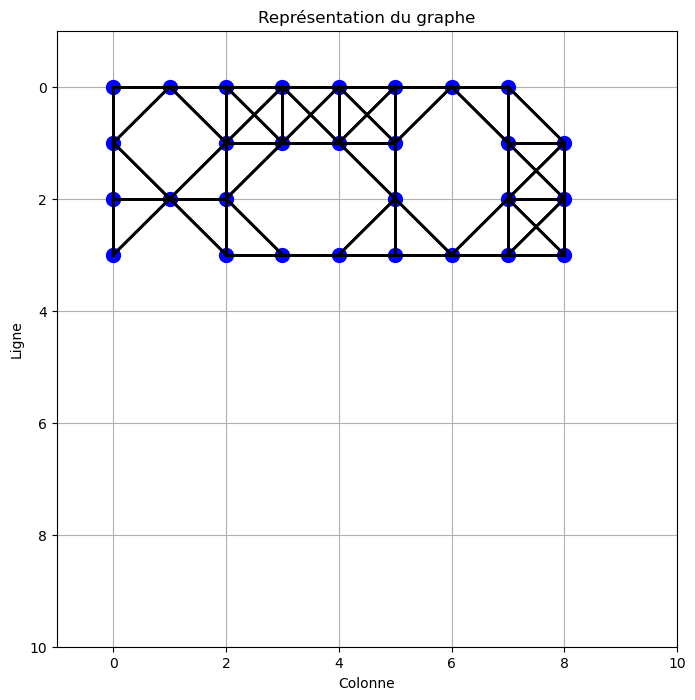

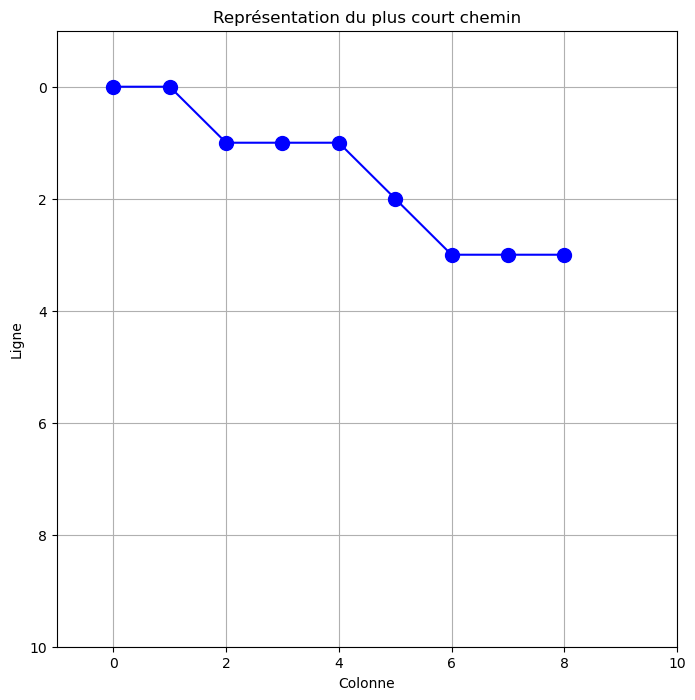

[(0, 0), (0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (3, 7), (3, 8)]


In [110]:
import math

def heuristic(node, goal):
    # Distance euclidienne entre deux sommets
    return math.sqrt((goal[0] - node[0]) ** 2 + (goal[1] - node[1]) ** 2)

def A_star(start, goal, graph):
    openSet = {start}
    cameFrom = {}
    gScore = {node: float('inf') for node in graph}
    gScore[start] = 0
    fScore = {node: float('inf') for node in graph}
    fScore[start] = heuristic(start, goal)

    while openSet:
        current = min(openSet, key=lambda node: fScore[node])
        if current == goal:
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path

        openSet.remove(current)
        for neighbor in graph[current]:
            tentative_gScore = gScore[current] + 1  # Assuming each edge has weight 1
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + heuristic(neighbor, goal)
                openSet.add(neighbor)

    return None

# Exemple d'utilisation
graph = {
    (0, 0): [(0, 1), (1, 0)],
    (0, 1): [(0, 0), (0, 2)],
    (0, 2): [(0, 1), (1, 2)],
    (1, 0): [(0, 0), (1, 1)],
    (1, 1): [(1, 0), (1, 2)],
    (1, 2): [(0, 2), (1, 1)]
}
adjacency_list = create_graph_from_file("exos/exo1.txt")
#print(adjacency_list)
plot_graph(adjacency_list)
start = (0, 0)
goal = (3, 8)
path = A_star(start, goal, adjacency_list)
plot_path(path)
print(path)


## 2. Probème du voyageur de commerce

In [145]:
def read_graph_from_file(filename):
    graph = {}
    with open(filename, 'r') as file:
        num_vertices, num_edges = map(int, file.readline().split())
        for _ in range(num_edges):
            v1, v2, cost = map(int, file.readline().split())
            if v1 not in graph:
                graph[v1] = {}
            if v2 not in graph:
                graph[v2] = {}
            graph[v1][v2] = cost
            graph[v2][v1] = cost  # Ajouter pour un graphe non orienté
    return graph


# Test de la fonction
filename = "./exos/test_voyageur_commerce.txt"  # Nom du fichier à lire
graph = read_graph_from_file(filename)
print(graph)


{0: {1: 10, 2: 15, 3: 20}, 1: {0: 10, 2: 35, 3: 25, 4: 30}, 2: {0: 15, 1: 35, 3: 30, 4: 25}, 3: {0: 20, 1: 25, 2: 30, 4: 40}, 4: {1: 30, 2: 25, 3: 40, 5: 10}, 5: {4: 10}}


Ensuite, nous devons formuler le problème du voyageur de commerce sous forme d'un programme linéaire en nombres entiers pour résoudre le problème avec CPLEX. Voici comment nous pourrions le faire :

1. **Variables de décision :** Soit \( x_{ij} \) une variable binaire indiquant si l'arête \( (i, j) \) est utilisée dans le cycle hamiltonien. Soit \( u_i \) une variable continue indiquant la position du sommet \( i \) dans le cycle.

2. **Fonction objectif :** Minimiser la somme des coûts des arêtes utilisées, c'est-à-dire \( \sum_{(i,j) \in A} d_{ij} \cdot x_{ij} \).

3. **Contraintes :**
   - Chaque sommet doit être visité exactement une fois : \( \sum_{j \neq i} x_{ij} = 1 \) pour tout \( i \).
   - Aucun sous-cycle ne doit être présent : \( u_i - u_j + 1 \leq (n-1) \cdot (1 - x_{ij}) \) pour tout \( i \) et \( j \) différents et non consécutifs.
   - Les valeurs des variables \( u_i \) doivent former un ordre cohérent : \( 2 \leq u_i \leq n \) et \( u_1 = 1 \).

Une fois que nous avons formulé le problème, nous pouvons implémenter et résoudre ce modèle mathématique avec CPLEX sur de petits graphes générés aléatoirement. Nous pourrions ensuite tester notre implémentation sur ces graphes et analyser les résultats observés.

In [144]:
import random

def generate_random_graph(n, p):
    graph = {}
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                cost = random.randint(10, 50)
                if i not in graph:
                    graph[i] = {}
                if j not in graph:
                    graph[j] = {}
                graph[i][j] = cost
                graph[j][i] = cost  # Si le graphe est non orienté
    return graph

# Test
n = 5  # Nombre de sommets
p = 0.5  # Probabilité d'avoir une arête entre deux sommets
random_graph = generate_random_graph(n, p)
print(random_graph)


{0: {1: 40, 3: 10, 4: 44}, 1: {0: 40, 2: 18, 4: 31}, 3: {0: 10, 4: 20}, 4: {0: 44, 1: 31, 3: 20}, 2: {1: 18}}


In [143]:
import itertools

def traveling_salesman_enumeration(graph):
    min_cost = float('inf')
    min_path = None
    
    # Générer toutes les permutations des villes
    cities = list(graph.keys())
    permutations = itertools.permutations(cities)
    
    # Parcourir chaque permutation
    for path in permutations:
        # Vérifier si le chemin est déjà invalide
        if any(path[i] not in graph[path[i-1]] for i in range(1, len(path))):
            continue
        
        # Calculer le coût total du chemin
        total_cost = sum(graph[path[i-1]][path[i]] for i in range(1, len(path)))
        
        # Vérifier si le coût total est le plus bas trouvé jusqu'à présent
        if total_cost < min_cost:
            min_cost = total_cost
            min_path = path
    
    return min_path, min_cost


# Test
graph = {
    'A': {'B': 10, 'C': 15, 'D': 20},
    'B': {'A': 10, 'C': 35, 'D': 25},
    'C': {'A': 15, 'B': 35, 'D': 30},
    'D': {'A': 20, 'B': 25, 'C': 30}
}
random_graph = generate_random_graph(n, p)
min_path, min_cost = traveling_salesman_enumeration(random_graph)
print("Graph généré aléatoirement", random_graph)
print("Chemin optimal:", min_path)
print("Coût total:", min_cost)


Graph généré aléatoirement {0: {1: 44, 3: 38}, 1: {0: 44, 3: 13, 4: 42}, 3: {0: 38, 1: 13, 4: 22}, 4: {1: 42, 2: 32, 3: 22}, 2: {4: 32}}
Chemin optimal: (0, 1, 3, 4, 2)
Coût total: 111
